Importing Libraries


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

Loading Dataset

In [ ]:
data = pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')

In [ ]:
data.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4354,ham,"Sorry, I can't help you on this.",NaN,NaN,NaN
2567,ham,I dont want to hear anything,NaN,NaN,NaN
5297,ham,My darling sister. How are you doing. When's s...,NaN,NaN,NaN
4276,ham,I'm glad. You are following your dreams.,NaN,NaN,NaN
25,ham,Just forced myself to eat a slice. I'm really ...,NaN,NaN,NaN
1987,ham,No calls..messages..missed calls,NaN,NaN,NaN
1454,ham,Can Ì_ all decide faster cos my sis going home...,NaN,NaN,NaN
536,ham,"Probably gonna be here for a while, see you la...",NaN,NaN,NaN
4104,ham,Jus finish my lunch on my way home lor... I to...,NaN,NaN,NaN
1273,spam,network operator. The service is free. For T &...,NaN,NaN,NaN


**Data Cleaning**

In [ ]:
# Size of the dataset
data.size

27860

In [ ]:
# Shape of the dataset
data.shape

(5572, 5)

In [ ]:
# Columns in the dataset
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Describes aboit the dataset
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
# Checking the null values in the dataset
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
# Renaming the Columns

data.rename({'v1':'Type','v2':'Email'},axis=1,inplace=True)
data

,Type,Email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
# Removing the Irrelavent Data or Columns from the dataset

df = data.drop(['Unnamed: 2','Unnamed: 3',	'Unnamed: 4'],axis=1)
df.sample(10)

,Type,Email
1368,ham,Alright. I'm out--have a good night!
3595,ham,Good morning princess! Happy New Year!
2102,ham,Audrie lousy autocorrect
2051,ham,Hey darlin.. i can pick u up at college if u t...
228,ham,Life is more strict than teacher... Bcoz Teach...
5546,ham,Ic. There are a lotta childporn cars then.
2832,spam,You've won tkts to the EURO2004 CUP FINAL or å...
874,ham,Talk With Yourself Atleast Once In A Day...!!!...
866,ham,"Same here, but I consider walls and bunkers an..."
3728,ham,I'm at home. Please call


In [ ]:
# LabelEncoding For the column name Type for easy calculations
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Type'] = le.fit_transform(df['Type'])
df.sample(10)

,Type,Email
2990,1,HOT LIVE FANTASIES call now 08707509020 Just 2...
1323,0,I thk 50 shd be ok he said plus minus 10.. Did...
2627,0,I know I'm lacking on most of this particular ...
1237,0,Is ur paper in e morn or aft tmr?
391,0,Hey so this sat are we going for the intro pil...
3977,0,Reason is if the team budget is available at l...
4720,0,"Yup. Anything lor, if u dun wan it's ok..."
2750,0,Ok but tell me half an hr b4 u come i need 2 p...
2665,0,R u meeting da ge at nite tmr?
5417,0,Nope. I just forgot. Will show next week


In [ ]:
# Checking Unique Values in the column of Type
df['Type'].unique()

array([0, 1])

In [ ]:
# Checking null values after removing the columns form the dataset
df.isnull().sum()

Type     0
Email    0
dtype: int64

In [ ]:
# Checking for duplicated columns in the dataset
df.duplicated().sum()


403

In [ ]:
# Removing Duplicates from the dataset

df = df.drop_duplicates(keep='first')
df.tail()

,Type,Email
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [ ]:
# Shape of the dataset after removing the unused columns from the dataset
df.shape

(5169, 2)

In [ ]:
# Checking the size of the dataset after removing the unused columns fron the dataset
df.size

10338

In [ ]:
# Checking the duplicateed rows in the dataset
df.duplicated().sum()

0

**Exploratory Data Analysis**

In [ ]:
# importing the matplotlib for visualizing part
import matplotlib.pyplot as plt

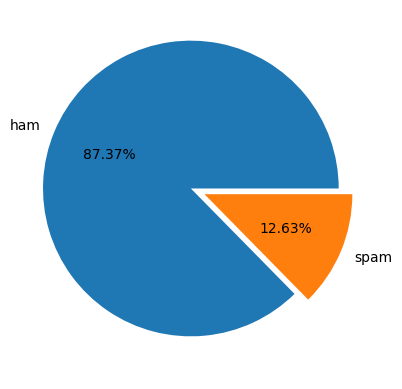

In [ ]:
# Plot a pie chart
plt.pie(df['Type'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0])
plt.show()

From the above pie chart we can observe that the data is imbalanced. So, now we are going to do Analysis on Number of Characters, Words, and Sentences Used in every Message

In [ ]:
# importing the nltk and downlading all methods to perform on sentencs and characters, and words
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
# Finding out Number of characters in each Message

df['num_of_characters'] = df['Email'].apply(len)
df.sample(10)

,Type,Email,num_of_characters
2158,0,I think you should go the honesty road. Call t...,114
1593,1,PRIVATE! Your 2003 Account Statement for shows...,136
4630,0,"Got hella gas money, want to go on a grand nat...",89
1775,0,Did u see what I posted on your Facebook?,41
507,0,You should know now. So how's anthony. Are you...,166
2815,0,Genius what's up. How your brother. Pls send h...,68
5489,0,Oh thanks a lot..i already bought 2 eggs ..,43
4969,0,We are supposed to meet to discuss abt our tri...,132
4499,0,Nvm take ur time.,17
1382,0,Its ok my arm is feeling weak cuz i got a shot...,72


In [ ]:
# Now Number of Words

df['num_words'] = df['Email'].apply(lambda x : len(nltk.word_tokenize(x)))
df.sample(10)

,Type,Email,num_of_characters,num_words
5344,0,When you guys planning on coming over?,38,8
3699,0,Oh...i asked for fun. Haha...take care. Ì_,42,13
3661,0,"What are you doing in langport? Sorry, but I'l...",133,33
1563,0,Get ready to put on your excellent sub face :),46,11
5259,0,Can help u swoop by picking u up from wherever...,82,19
2336,0,\Aww you must be nearly dead!Well Jez isComing...,96,21
3207,0,Oops my phone died and I didn't even know. Yea...,65,17
1805,0,God bless.get good sleep my dear...i will pray!,47,11
5464,0,I will treasure every moment we spend together...,49,9
2282,0,Whom you waited for yesterday,29,5


In [ ]:
# Number of Sentences

df['num_sentence'] = df['Email'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.sample(10)

,Type,Email,num_of_characters,num_words,num_sentence
989,0,Ugh. Gotta drive back to sd from la. My butt i...,53,16,3
2352,0,Thats cool. How was your day?,29,8,2
216,0,Tired. I haven't slept well the past few nights.,48,12,2
1803,0,I'm in class. Did you get my text.,34,11,2
3312,0,"Huh... Hyde park not in mel ah, opps, got conf...",113,30,2
2866,0,"Mum, i've sent you many many messages since i ...",142,34,3
1387,0,Hope ur head doesn't hurt 2 much ! Am ploughin...,139,31,3
996,0,Yetunde i'm in class can you not run water on ...,72,19,1
3081,0,"And very importantly, all we discuss is betwee...",61,14,1
4425,0,Was it something u ate?,23,6,1


In [ ]:
##ham

df[df['Type'] == 0][['num_of_characters','num_words','num_sentence']].describe()

,num_of_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
##Spam

df[df['Type'] == 1][['num_of_characters','num_words','num_sentence']].describe()

,num_of_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


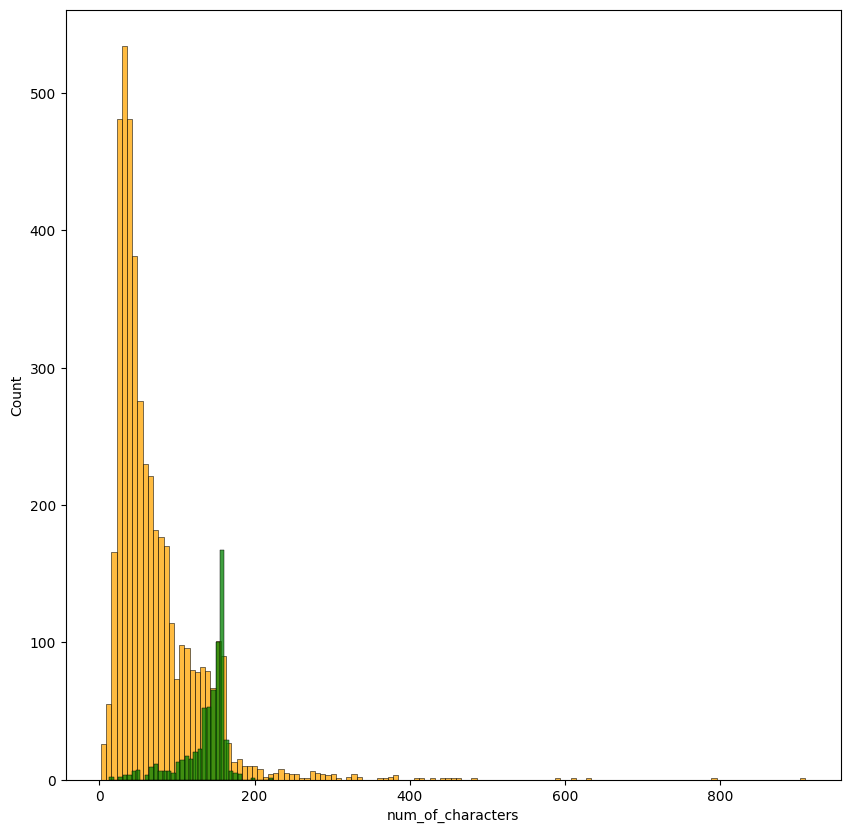

In [ ]:
# importing the seaborn for visualizing part
import seaborn as sns

# Plot a histogram to show the distributiions of dataset
plt.figure(figsize=(10,10))
sns.histplot(df[df['Type'] == 0]['num_of_characters'],color='orange')
sns.histplot(df[df['Type'] == 1]['num_of_characters'],color='green')
plt.show()

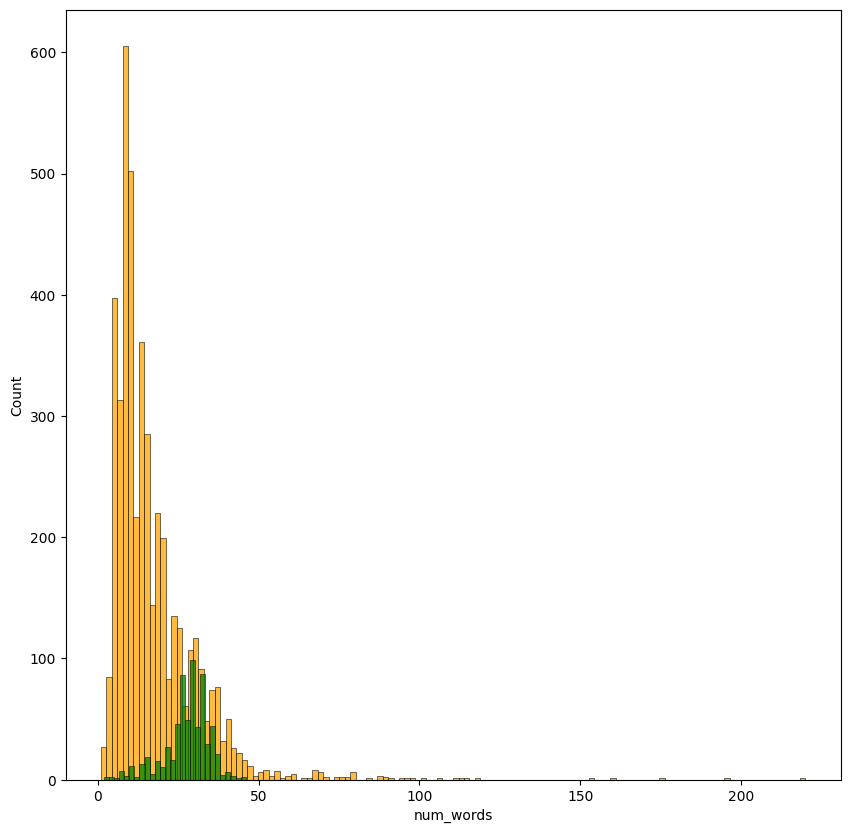

In [ ]:
plt.figure(figsize=(10,10))
# Plot a histogram to show the distributiions of dataset
sns.histplot(df[df['Type'] == 0]['num_words'],color = 'orange')
sns.histplot(df[df['Type'] == 1]['num_words'],color='green')
plt.show()

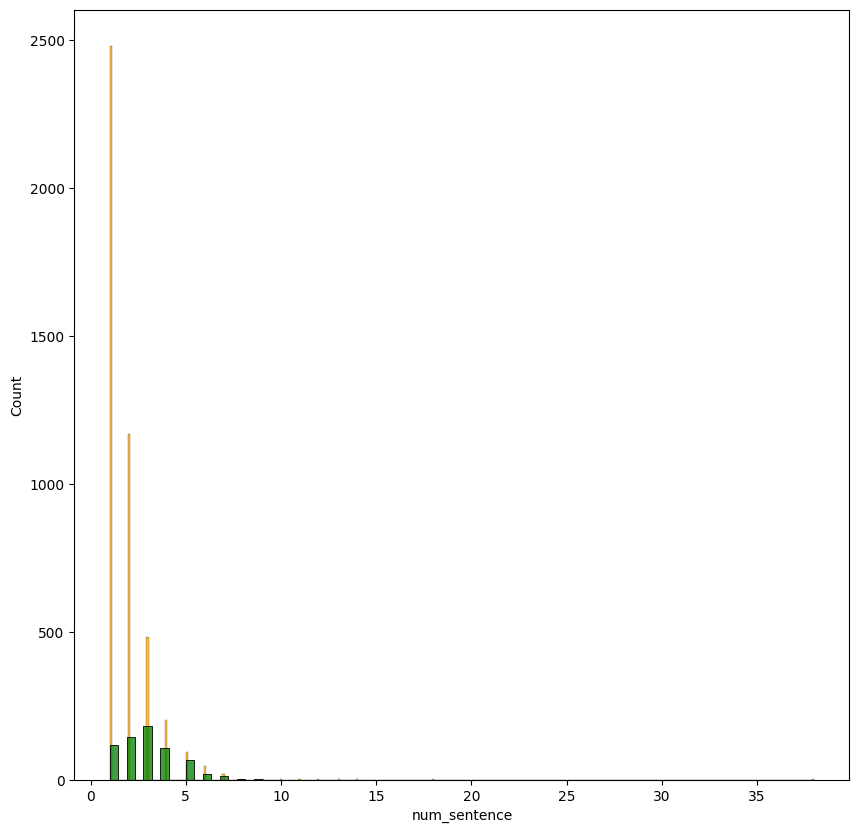

In [ ]:
plt.figure(figsize=(10,10))
# Plot a histogram to show the distributiions of dataset
sns.histplot(df[df['Type'] == 0]['num_sentence'],color='orange')
sns.histplot(df[df['Type'] == 1]['num_sentence'],color='green')
plt.show()

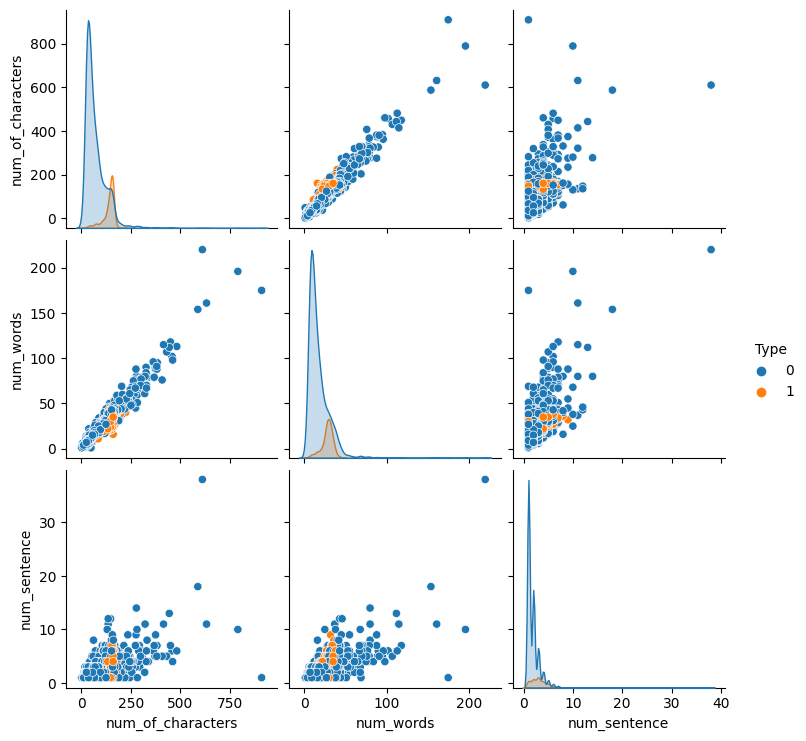

In [ ]:
# Pairwise relation in dataset
sns.pairplot(df,hue='Type')
plt.show()

<ipython-input-164-5fa05b1748cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


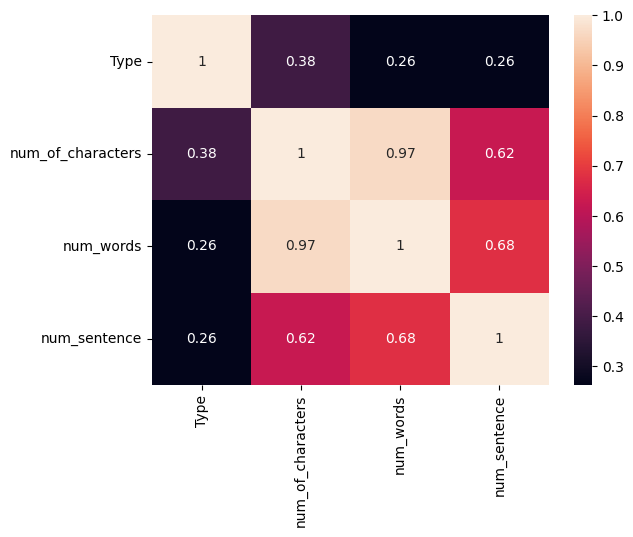

In [ ]:
# Coorelation in dataset
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: xlabel='Type', ylabel='num_of_characters'>

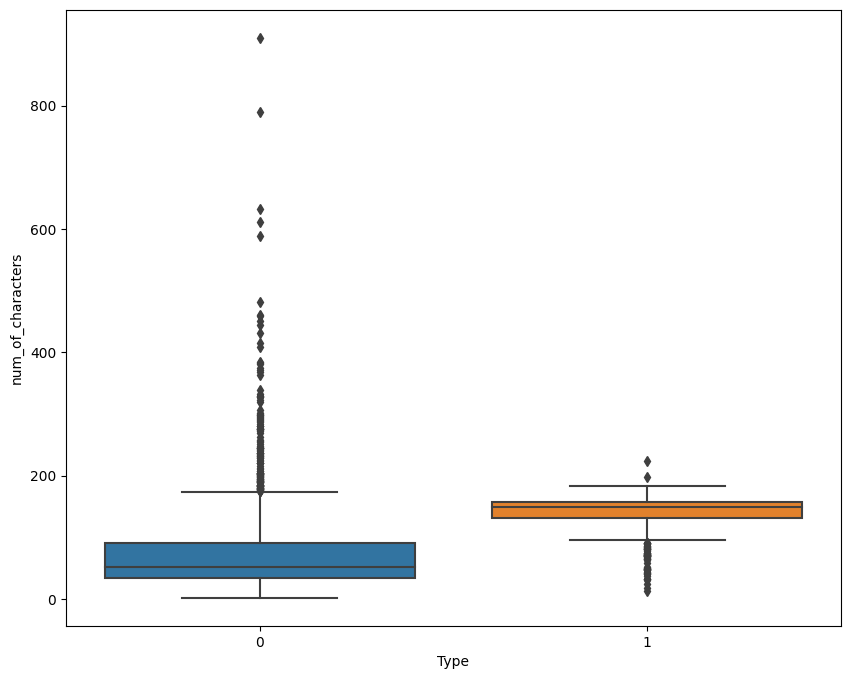

In [ ]:
'''The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a methodthat is a function of the inter-quartile range.'''
plt.figure(figsize=(10,8))
sns.boxplot(x='Type',y='num_of_characters',data=df)

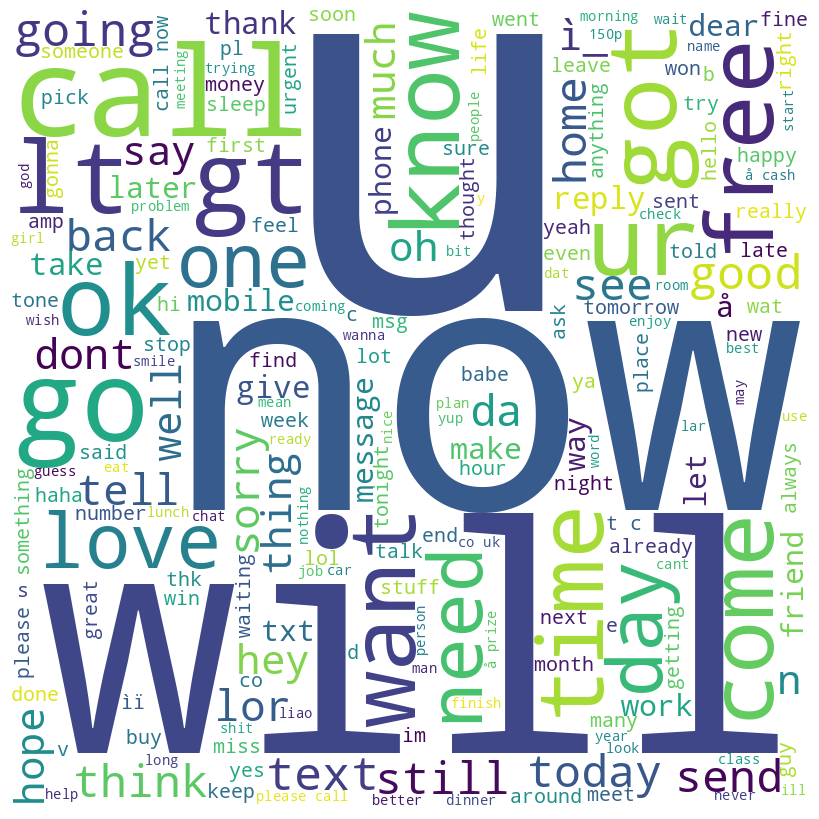

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS




comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.Email:

    # typecaste each val to string
    val = str(val)

    # split the value
    Type = val.split()

    # Converts each token into lowercase
    for i in range(len(Type)):
        Type[i] = Type[i].lower()

    comment_words += " ".join(Type)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Train Test Split Dataset


CountVectorizer to convert the text into matrices

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
x = df.Email
cv = CountVectorizer()
x = cv.fit_transform(x)

In [ ]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x.reshape(-1,1)

<44825568x1 sparse matrix of type '<class 'numpy.int64'>'
	with 68018 stored elements in COOrdinate format>

Naive Bayes have threee Classifier ( Bernouli, Multinominal, Gaussian). Here, I use Multinominal Bayes beacuse here data in a discrete form discrete data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,df.Type,test_size=0.10,random_state=104)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

Training The Model

In [ ]:
from sklearn.pipeline import Pipeline

mut = MultinomialNB()

In [ ]:
mut.fit(x_train,y_train)

MultinomialNB()

In [ ]:
mut.score(x_test,y_test)

0.9806576402321083

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

In [ ]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [ ]:
bnb.score(x_test,y_test)

0.9806576402321083

Perfomrnace Metrics

In [ ]:
# history = mut.fit(x_train, y_train,validation_data=(x_test, y_test))
y_predict = [1 if o>0.5 else 0 for o in mut.predict(x_test)]

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
cf_matrix =confusion_matrix(y_test,y_predict)
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(y_test,y_predict)))

Precision: 87.04%
Recall: 94.00%
F1 Score: 90.38%


Confusion Matrix

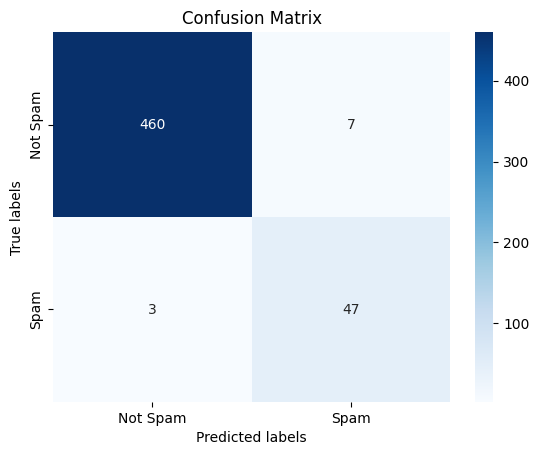

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [ ]:
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(df['Email'])

# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(features, df['Type'])

MultinomialNB()

In [ ]:
def predict_spam(email_text):
    email_features = vectorizer.transform([email_text])
    prediction = classifier.predict(email_features)
    if prediction[0] == 1:
        return "Spam"
    else:
        return "Not Spam"

# Example usage
email_text = "Get rich quick!"
prediction = predict_spam(email_text)
print("Prediction:", prediction)

Prediction: Not Spam


In [ ]:
import pickle
